<a href="https://colab.research.google.com/github/lukmanaj/ArewaDS-Deep-Learning-with-PyTorch-Assignments/blob/main/Part_1_Deep_Learning_with_PyTorch/week_04/week_4_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 1.0

### WEEK 2 Exercises

####Name : Lukman Aliyu Jibril

####email: lukman.j.aliyu@gmail.com



### Exercises:
Please, see week 4 exercises from [**Learn PyTorch for Deep Learning**: 03. Pytorch Computer Vision](https://www.learnpytorch.io/03_pytorch_computer_vision/#exercises)

# 1. **What are 3 areas in industry where computer vision is currently being used?**


Computer vision is being actively used in several industries. Three notable areas include:

1. Healthcare: Computer vision is used for medical imaging analysis, helping in the diagnosis of diseases, analyzing X-rays, MRIs, and CT scans, and aiding in surgical procedures through image-guided interventions.

2. Automotive Industry: It's heavily employed in the development of autonomous vehicles. Computer vision systems enable cars to interpret and understand the environment around them, such as detecting obstacles, reading traffic signs, and lane detection.

3. Retail: Computer vision is utilized in retail for various applications such as inventory management, customer behavior analysis, and enhancing the shopping experience through augmented reality. Additionally, it plays a significant role in automated checkout systems and theft prevention.








# 2. **Search "what is overfitting in machine learning" and write down a sentence about what you find.**

Overfitting in machine learning occurs when a model is excessively complex, learning not only the underlying patterns in the training data but also its noise and random fluctuations. As a result, while the model may perform exceptionally well on the training data, it fails to generalize effectively to new, unseen data. This leads to poor predictive performance when the model is applied to data it hasn't encountered before.

# 3. **Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. Note: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.**

To prevent overfitting in machine learning, several strategies can be employed:

1. Cross-validation: This technique involves dividing the dataset into several subsets. The model is trained on a combination of these subsets and validated against the remaining parts. This approach helps in tuning the model effectively, ensuring it doesn't just memorize the training data but learns to generalize from it.

2. Training with More Data: Using a larger dataset can enhance the model's ability to generalize. This is because more data provides a better representation of the real-world scenario, allowing the model to learn the underlying patterns more effectively. However, it's important that the added data is relevant and not just more noise.

3. Regularization: This involves adding a penalty to the model for complexity, encouraging simplicity in the model structure. Regularization techniques like weight decay (L2 regularization) or L1 regularization help in keeping the model weights small, thus making the model less prone to overfitting. These techniques are particularly useful in neural networks where the model complexity can be very high.

4. **Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).
# Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.**

Done

# 5. **Load the torchvision.datasets.MNIST() train and test datasets.**

In [14]:
import torch
from torch import nn
from torchvision import datasets, transforms
from tqdm import tqdm


In [1]:
# Load the MNIST dataset
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transforms.ToTensor())


100%|██████████| 9912422/9912422 [00:00<00:00, 224556356.84it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 8550553.67it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 149778910.14it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 24084107.17it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [2]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

# 6. **Visualize at least 5 different samples of the MNIST training dataset.**

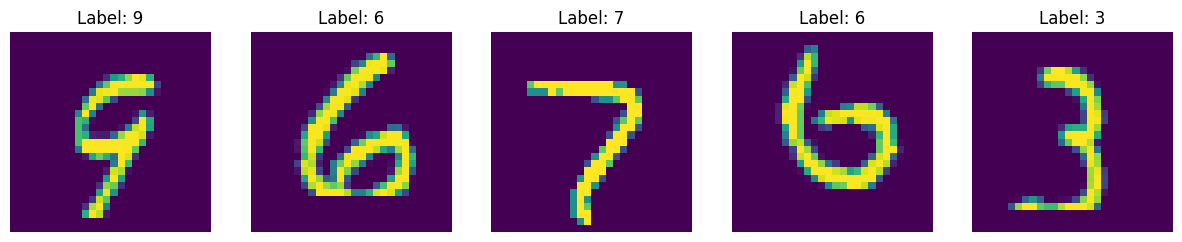

In [3]:
import matplotlib.pyplot as plt
import random

# Set number of images
num_images = 5

# Randomly select images and labels
random_indices = random.sample(range(len(train_data)), num_images)

# Create a plot for each image
plt.figure(figsize=(15, 3))
for i, index in enumerate(random_indices):
    image, label = train_data[index]
    plt.subplot(1, num_images, i+1)
    plt.imshow(image.squeeze())
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()


# 7. **Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32**

In [4]:
from torch.utils.data import DataLoader
# set up the batchsize
batch_size = 32
train_dataloader = DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=batch_size,shuffle=False)
# Confirming what we check
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x78239d313b50>, <torch.utils.data.dataloader.DataLoader object at 0x78239d312b00>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [5]:
# Checking out the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

# 8. **Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.**

In [6]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [7]:
import torch.nn as nn


# Create a convolutional neural network
class MNISTModel(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_1 = MNISTModel(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_1

MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [8]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

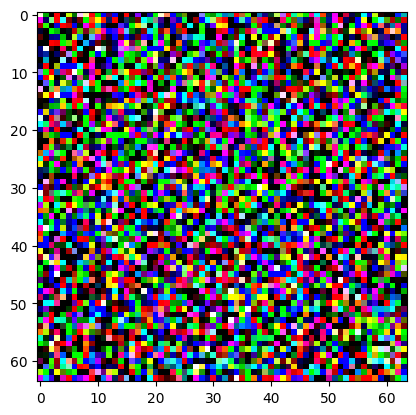

In [9]:
plt.imshow(test_image.reshape(test_image.shape[1],test_image.shape[2],test_image.shape[0]))

# 9. **Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.**



In [15]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [11]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}



In [12]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [13]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                             lr=0.1)

In [16]:
torch.manual_seed(42)
device = "cuda"
# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.27327 | Train accuracy: 90.97%


 33%|███▎      | 1/3 [00:13<00:26, 13.43s/it]

Test loss: 0.06940 | Test accuracy: 97.83%

Epoch: 1
---------
Train loss: 0.07479 | Train accuracy: 97.66%


 67%|██████▋   | 2/3 [00:25<00:12, 12.57s/it]

Test loss: 0.05347 | Test accuracy: 98.25%

Epoch: 2
---------
Train loss: 0.05756 | Train accuracy: 98.23%


100%|██████████| 3/3 [00:38<00:00, 12.83s/it]

Test loss: 0.05370 | Test accuracy: 98.23%

Train time on cuda: 38.495 seconds


In [17]:
device = "cpu"
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.05065 | Train accuracy: 98.41%


 33%|███▎      | 1/3 [00:11<00:23, 12.00s/it]

Test loss: 0.04757 | Test accuracy: 98.50%

Epoch: 1
---------
Train loss: 0.04402 | Train accuracy: 98.61%


 67%|██████▋   | 2/3 [00:23<00:11, 11.97s/it]

Test loss: 0.05303 | Test accuracy: 98.22%

Epoch: 2
---------
Train loss: 0.03959 | Train accuracy: 98.74%


100%|██████████| 3/3 [00:35<00:00, 11.94s/it]

Test loss: 0.04767 | Test accuracy: 98.44%

Train time on cpu: 35.830 seconds


Somehow CPU is faster.

# 10. **Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label**

In [31]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [20]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=5):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [32]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_1,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[5.1163e-14, 7.2112e-09, 1.0000e+00, 2.0960e-09, 1.1415e-18, 1.8835e-19,
         1.5075e-17, 3.2840e-11, 5.5426e-09, 2.4573e-14],
        [2.2472e-08, 9.9955e-01, 1.0679e-06, 1.5906e-08, 6.5872e-07, 1.5833e-04,
         4.1087e-05, 2.6591e-07, 2.1352e-04, 3.4382e-05]])

In [33]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6])

In [34]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([2, 1, 2, 4, 6], tensor([2, 1, 2, 4, 6]))

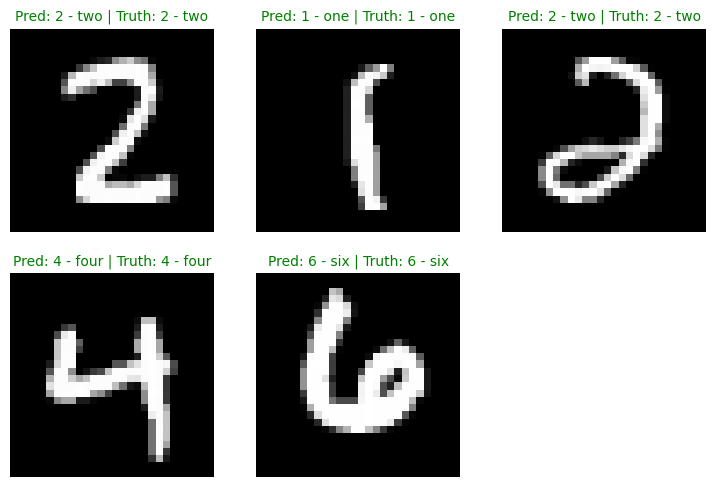

In [35]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

# 11. **Plot a confusion matrix comparing your model's predictions to the truth labels.**

In [27]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_1.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_1(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [28]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.5 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [29]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


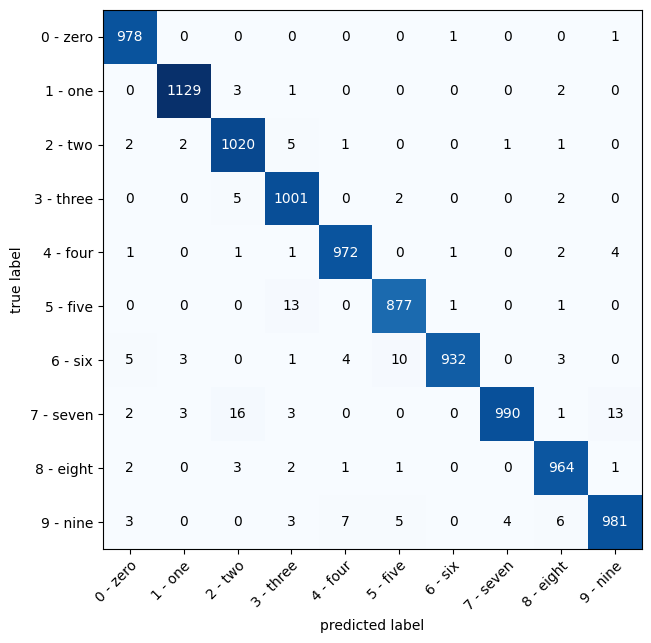

In [30]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

# 12. **Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?**

In [36]:


# Create a random tensor of shape [1, 3, 64, 64]
x = torch.rand((1, 3, 64, 64))

# Define a convolutional layer with different kernel sizes
conv1 = nn.Conv2d(3, 16, 3)
conv2 = nn.Conv2d(3, 16, 5)
conv3 = nn.Conv2d(3, 16, 7)

# Apply the convolutional layers to the input tensor
y1 = conv1(x)
y2 = conv2(x)
y3 = conv3(x)

# Print the shapes of the output tensors
print(y1.shape)
print(y2.shape)
print(y3.shape)




torch.Size([1, 16, 62, 62])
torch.Size([1, 16, 60, 60])
torch.Size([1, 16, 58, 58])


In [44]:
import torch.nn as nn

def count_model_parameters(model):
    """
    Counts the total and trainable parameters in a PyTorch model.

    Args:
    model (nn.Module): The PyTorch model.

    Returns:
    tuple: A tuple containing the total parameters and trainable parameters.
    """
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    return total_params, trainable_params


In [46]:
count_model_parameters(conv1),count_model_parameters(conv2),count_model_parameters(conv3)

((448, 448), (1216, 1216), (2368, 2368))

Notice that as the kernel size increases, the output tensor becomes smaller. This is because the convolutional layer takes a sliding window over the input tensor, and the size of the window determines how much of the input tensor is covered by each output pixel. As the kernel size increases, the window covers more of the input tensor, and so the output tensor becomes smaller.

Also notice that as the kernel size increases, the number of parameters in the convolutional layer increases. This is because the convolutional layer has to learn a separate set of weights for each pixel in the output tensor. As the output tensor becomes smaller, the number of pixels in the output tensor decreases, and so the number of parameters in the convolutional layer decreases.
In general, it is a good idea to use a small kernel size for convolutional layers, as this will help to reduce the number of parameters in the model and make it more efficient. However, if the input tensor is large, it may be necessary to use a larger kernel size in order to cover the entire input tensor.


# 13. **Use a model similar to the trained model_2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.Then plot some predictions where the model was wrong alongside what the label of the image should've been. After visualing these predictions do you think it's more of a modelling error or a data error? As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?**

In [47]:
fashion_test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transforms.ToTensor())


100%|██████████| 26421880/26421880 [00:02<00:00, 10414867.47it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 173440.73it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3257485.46it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20603317.74it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [48]:
fashion_test_dataloader = DataLoader(fashion_test_data,batch_size=batch_size,shuffle=False)

Checking for errors:   0%|          | 0/313 [00:00<?, ?it/s]

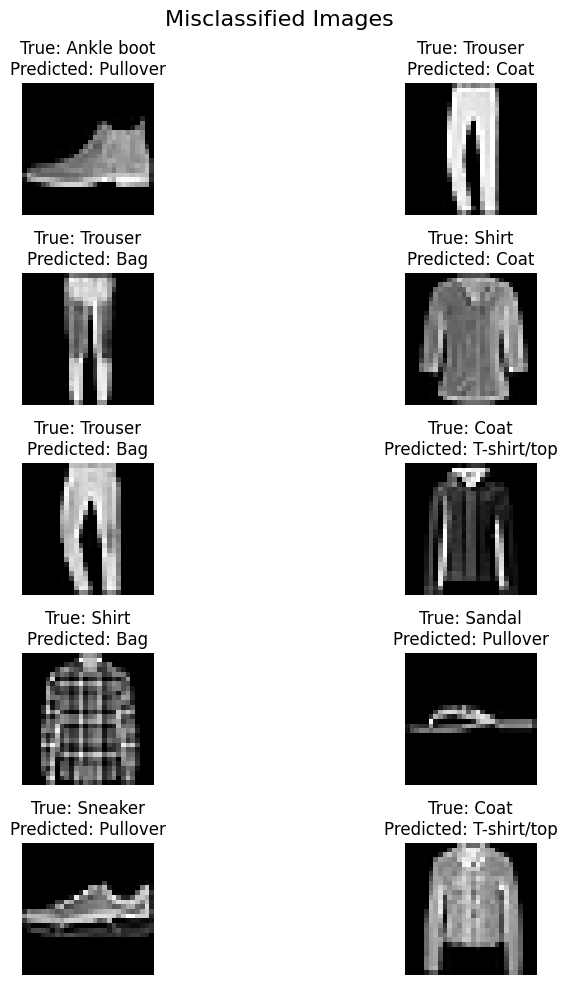

In [52]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Define class labels for FashionMNIST
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Make Predictions and Find Misclassifications
misclassified = []
with torch.inference_mode():
    for images, labels in tqdm(fashion_test_dataloader,desc="Checking for errors"):
        images, labels = images.to(device), labels.to(device)
        outputs = model_1(images)
        _, predicted = torch.max(outputs, 1)
        misclassified += [(image, pred.item(), label.item()) for image, pred, label in zip(images, predicted, labels) if pred != label]

# Move misclassified images to CPU for plotting
misclassified = [(image.to("cpu"), pred, label) for image, pred, label in misclassified]

# Plot Misclassified Images
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))
fig.suptitle('Misclassified Images', fontsize=16)
for ax, (image, pred, label) in zip(axes.flatten(), misclassified[:10]):
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f"True: {classes[label]}\nPredicted: {classes[pred]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


I believe the model has room for improvement since several of its predictions are significantly inaccurate. For instance, it mistakenly identified a shirt as a bag and a sneaker as a pullover.







### Additional Exercise
[Click to view PDF 📄](ArewaDS_Deep_Learning_Advanced_Assignment_Week2.pdf)

SUBMIT ASSIGNMENT HERE: [CLICK ME ▶️](https://forms.gle/876vi4aNoFf4A2mU7)